# Pymaceuticals Inc.
---

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#create a path
mouse_path = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"
#read csv
mouse_df = pd.read_csv(mouse_path)
study_df = pd.read_csv(study_results)

mouse_study = pd.merge(mouse_df,study_df,on='Mouse ID',how = 'outer')
mouse_study_df = mouse_study.drop_duplicates()
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
mouse_study_df['Mouse ID'].nunique()

249

## Summary Statistics

In [6]:
#Calculate mean,median,variance,standard deviation,and standard mean error
stats_mouse_study= mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
stats_mouse_study
#rename columns
renamed_stats = stats_mouse_study.rename(columns = {'mean':'Mean Tumor Volume','median':'Median Tumor Volume',
                                                   'var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.',
                                                   'sem':'Tumor Volume Std. Err.'})

renamed_stats.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [7]:
#pull columns Drug Regimen and Mouse ID from the dataframe
mouse_drug = mouse_study_df[['Drug Regimen','Mouse ID']]
#group by Drug Regimen
mouse_regime = pd.DataFrame(mouse_drug.groupby(['Drug Regimen']).count())

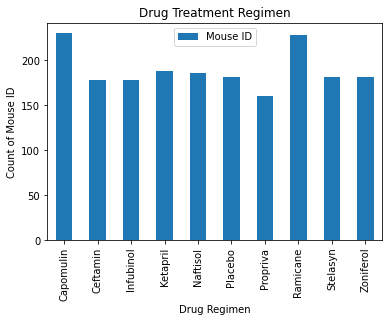

<Figure size 432x288 with 0 Axes>

In [8]:
#Generate bar plot
mouse_regime.plot(kind='bar')
#label axis titles 
plt.title("Drug Treatment Regimen")
plt.ylabel('Count of Mouse ID')
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count of Mouse ID')

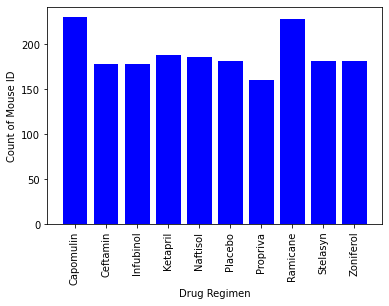

In [9]:
#generate bar plot
x_axis = np.arange(len(mouse_regime))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,mouse_regime['Mouse ID'],color='blue', align="center")
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol',
                           'Ketapril','Naftisol','Placebo','Propriva',
                          'Ramicane','Stelasyn','Zoniferol'],rotation = 'vertical')
#label axis title
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Mouse ID')

In [10]:
#pull columns Sex and Mouse ID
mouse_gender = mouse_study_df[['Sex','Mouse ID']]
#Group by sex and count rows
mouse_gender_id = pd.DataFrame(mouse_gender.groupby(['Sex']).count()).reset_index()
#Calculate perecntage of mouse ID
percent = round(mouse_gender_id['Mouse ID']/len(mouse_study_df),2)


([<matplotlib.patches.Wedge at 0x261d4cb3898>,
 [Text(-1.088753849298, -0.15689185969574046, 'Female'),
  Text(1.0887538492980002, 0.15689185969573985, 'Male')],
 [Text(-0.5938657359807272, -0.08557737801585842, '49.0%'),
  Text(0.5938657359807273, 0.08557737801585809, '51.0%')])

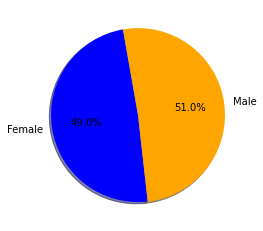

In [11]:
#Generate pie chart
#label sex
gender = ['Female','Male']
sizes = percent
colors = ['blue','orange']

plt.pie(sizes, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)

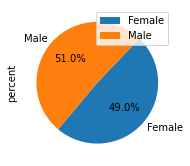

In [17]:
#Add percent to dataframe
mouse_gender_id['percent']= percent
#Generate pie chart
ax1 = plt.subplot(121, aspect="equal")
mouse_gender_id.plot(kind="pie", y = 'percent',ax=ax1, autopct='%1.1f%%',labels=mouse_gender_id["Sex"],startangle=230)

## Quartiles, Outliers and Boxplots

In [68]:
Mouse_time = pd.DataFrame(mouse_study_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last().sort_values()).reset_index()

In [74]:
merged_df = pd.merge(mouse_study_df, Mouse_time, on='Mouse ID',how='inner')

In [75]:
labels_drug=['Capomulin','Ramicane','Infubinol','Ceftamin']

In [76]:
volume_lists = []
for treatment in labels_drug:
    volume = merged_df.loc[merged_df['Drug Regimen']==treatment,'Tumor Volume (mm3)_y']
    volume_lists.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (volume.loc[(volume < lower_bound) | (volume > upper_bound)]).count()

    print(f'IQR for {treatment}: {iqr}')  
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 7.715031280000002
Lower Bound for Ramicane: 19.522788129999995
Upper Bound for Ramicane: 50.38291325
Number of Ramicane outliers: 0
IQR for Infubinol: 9.165049640000007
Lower Bound for Infubinol: 43.28428740999999
Upper Bound for Infubinol: 79.94448597000002
Number of Infubinol outliers: 2
IQR for Ceftamin: 4.9879359100000045
Lower Bound for Ceftamin: 52.25999677499999
Upper Bound for Ceftamin: 72.21174041500001
Number of Ceftamin outliers: 13


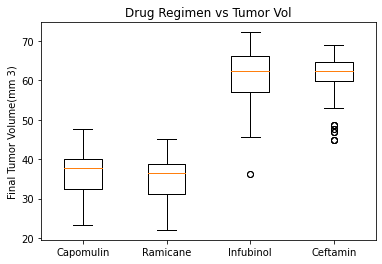

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume_lists, labels=labels_drug)
plt.ylabel("Final Tumor Volume(mm 3)")
plt.title("Drug Regimen vs Tumor Vol")
plt.show()

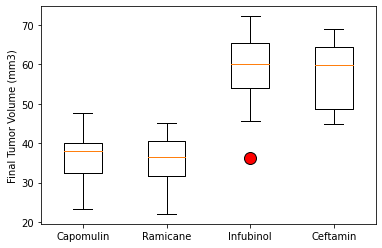

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [8]:
mouse_s = mouse_study_df.loc[mouse_study_df['Mouse ID']=='s185',:]

In [9]:
s_mouse = mouse_s[['Mouse ID','Tumor Volume (mm3)','Timepoint']]

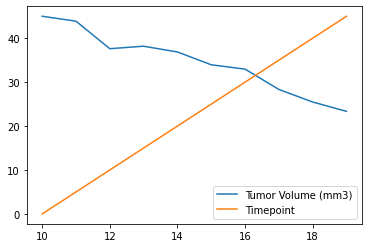

In [10]:
s_mouse.plot.line()

In [35]:
mouse_cap = mouse_study_df.loc[mouse_study_df['Drug Regimen']=='Capomulin',:]

In [36]:
mouse_cap_group = mouse_cap[['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
mouse_c = pd.DataFrame(mouse_cap_group)
mouse_capo = mouse_c.groupby('Mouse ID').mean()

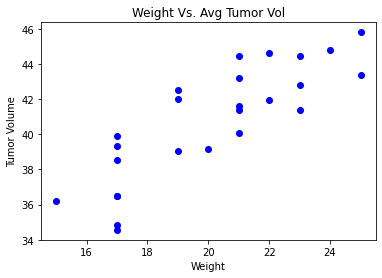

In [42]:
plt.scatter(mouse_capo['Weight (g)'],mouse_capo['Tumor Volume (mm3)'], color="blue")
plt.xlabel("Weight")
plt.ylabel("Verage Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()

## Correlation and Regression

The correlation coefficient between malic acid and flavanoids is 0.84


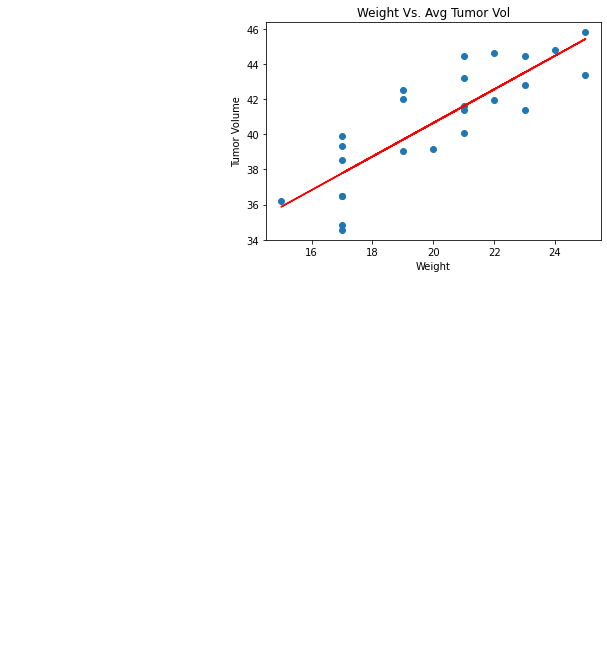

In [45]:
x_values = mouse_capo["Weight (g)"]
y_values =mouse_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()

In [ ]:
#Based on the bar graph, there were more mice tested on Ramicane and Capomulin

#Based on the pie chart, there i a higher percentage of male mice than female mice that were used in this study

#Based on the correlation coefficient between Weight and Tumor volume, we can state that the correlation is high. A number close to 1.0 shows a high strength in a relationship between the two variables. Here we see a positive correlation between the two variables. As weight increases so does the Average tumor volume.

